In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_ml_quant import pd, np
import seaborn as sns
import scipy.stats as scs

automatically imported pandas_ml_utils 0.1.14.1
automatically imported pandas_ml_quant_data_provider 0.1.14.1


In [3]:
date_since = "2019-12-30"
date_until = "2020-10-30"

In [4]:
# Healthcare - SPDR Index
_xlv = pd.fetch_yahoo("XLV").loc[date_since:date_until]
# Technology - SPDR Index
_xlk = pd.fetch_yahoo("XLK").loc[date_since:date_until]
# Retail - Dow Jones Index
_djusrt = pd.fetch_yahoo("XRT").loc[date_since:date_until]
# Gasoline (Manufacturing) - US Oil Fund Index 
_uso = pd.fetch_yahoo("USO").loc[date_since:date_until]

In [22]:
xlv = _xlv["Close"]
xlk = _xlk["Close"]
djusrt = _djusrt["Close"]
uso = _uso["Close"]

In [23]:
df = pd.concat([xlv, xlk, djusrt, uso], join='inner',axis=1)
df.columns = ['XLV', 'XLK', 'DJUSRT', 'USO']

,XLV,XLK,DJUSRT,USO
Date,,,,
2019-12-30,100.34,90.46,45.42,103.12
2019-12-31,100.54,90.74,45.50,102.48
2020-01-02,100.81,92.44,45.16,102.48
2020-01-03,99.93,91.41,44.81,105.44
2020-01-06,100.55,91.62,44.97,105.28


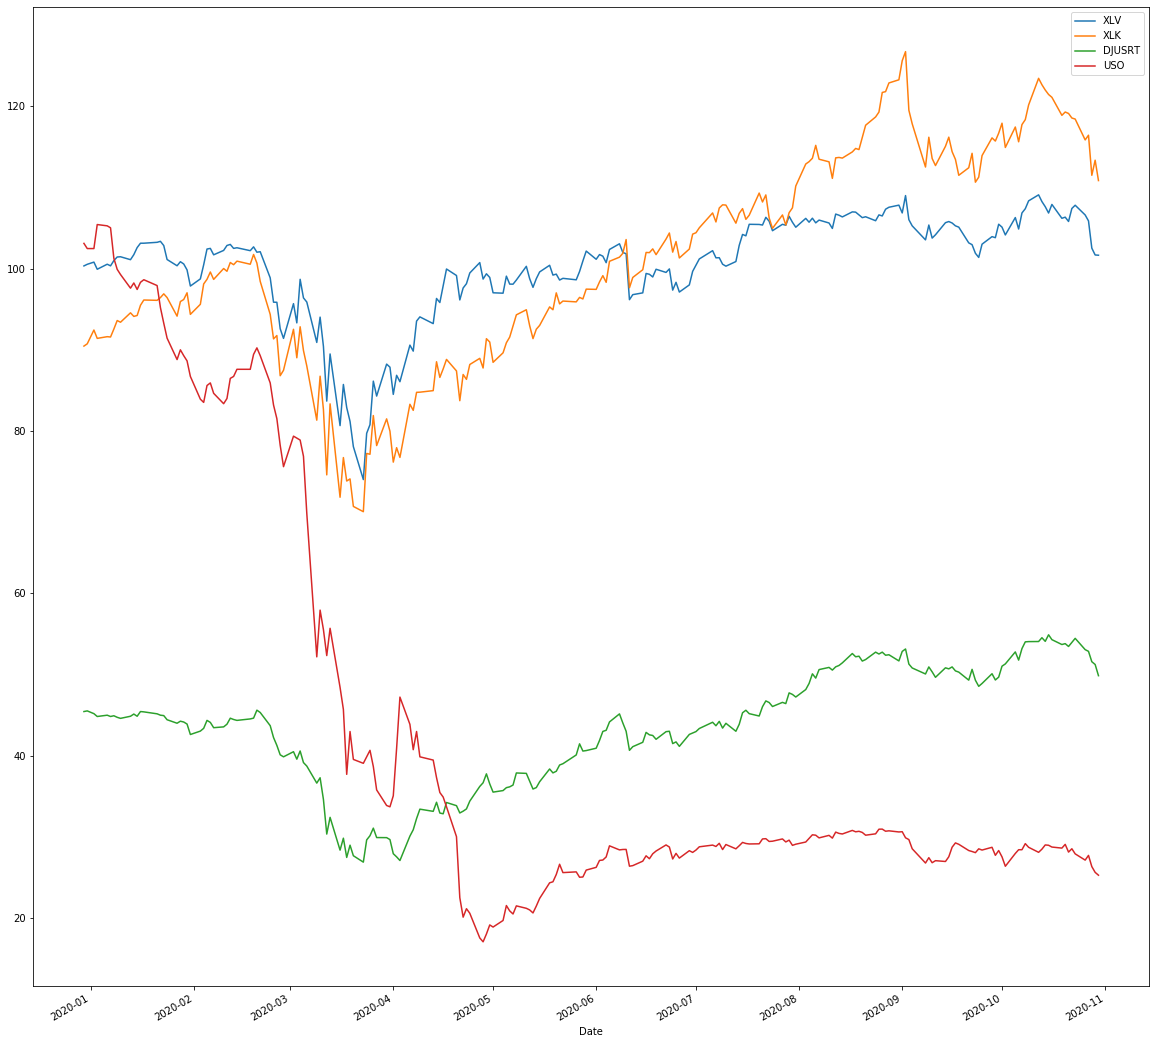

In [7]:
df.plot(figsize=(20,20))

In [8]:
def _returns(df):
    return (np.log(df / df.shift(1))) * 100

returns = df.apply(_returns).dropna()
returns.columns = ['XLV', 'XLK', 'DJUSRT', 'USO']

In [9]:
xlv_r = _xlv['Close'].pct_change().dropna()
xlk_r = _xlk['Close'].pct_change().dropna()
djusrt_r = _djusrt['Close'].pct_change().dropna()
uso_r = _uso['Close'].pct_change().dropna()

In [10]:
# Drawdown 1 -- XLV
wi1 = 1000*(1+xlv_r).cumprod()
pp1 = wi1.cummax()
dd1 = (wi1 - pp1)/pp1

In [11]:
# Drawdown 2 -- XLK
wi2 = 1000*(1+xlk_r).cumprod()
pp2 = wi2.cummax()
dd2 = (wi2 - pp2)/pp2

In [12]:
# Drawdown 3 -- DJUSRT
wi3 = 1000*(1+djusrt_r).cumprod()
pp3 = wi3.cummax()
dd3 = (wi3 - pp3)/pp3

In [13]:
# Drawdown 4 -- USO
wi4 = 1000*(1+uso_r).cumprod()
pp4 = wi4.cummax()
dd4 = (wi4 - pp4)/pp4

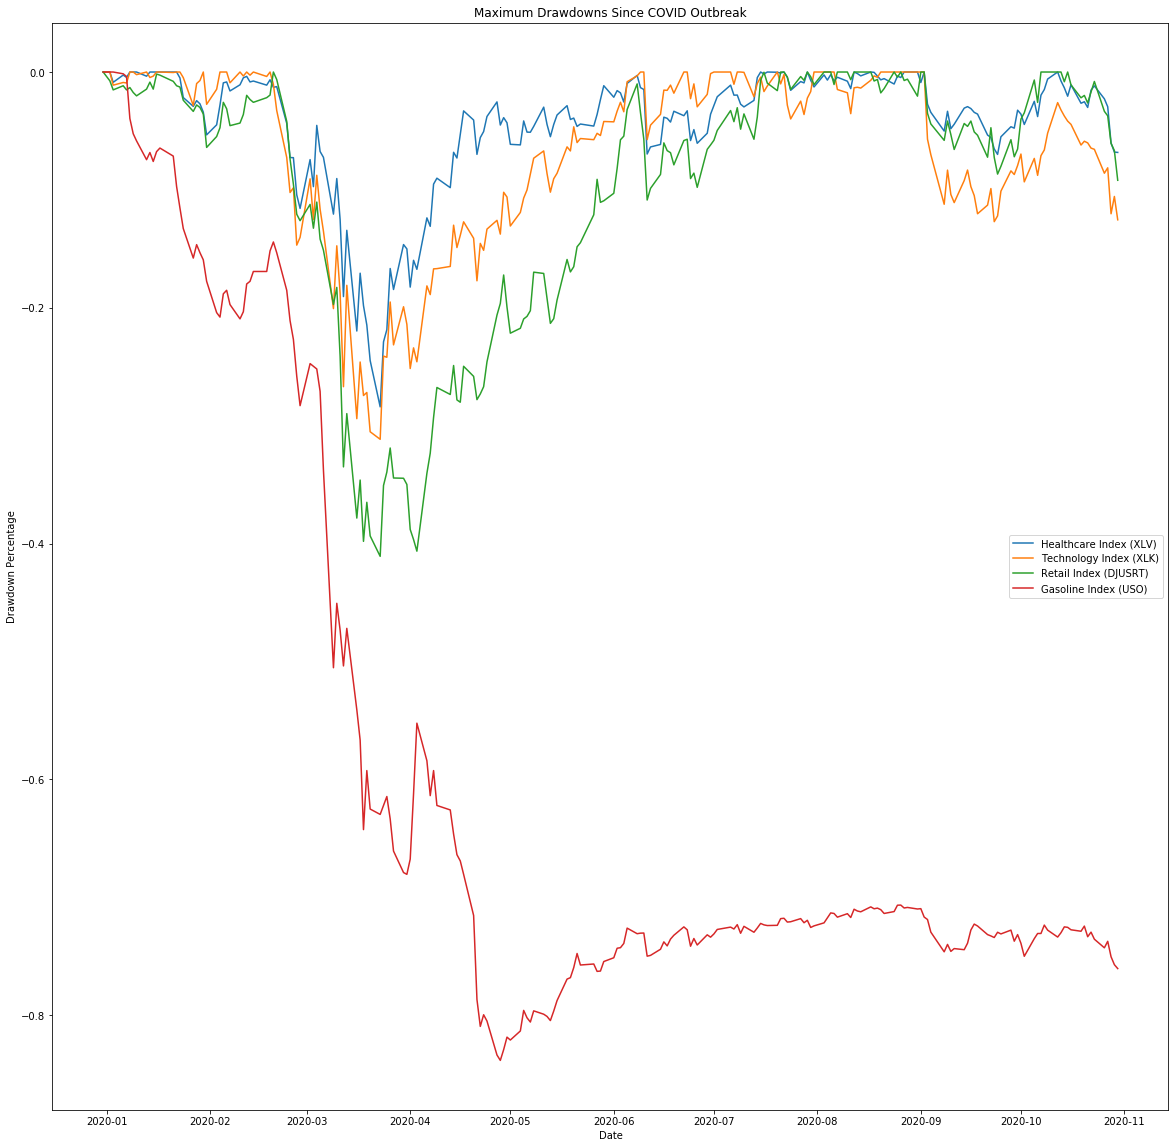

In [24]:
plt.figure(figsize=(20,20))
plt.plot(dd1, label="Healthcare Index (XLV)")
plt.plot(dd2, label="Technology Index (XLK)")
plt.plot(dd3, label="Retail Index (DJUSRT)")
plt.plot(dd4, label="Gasoline Index (USO)")
plt.xlabel("Date")
plt.ylabel("Drawdown Percentage")
plt.title("Maximum Drawdowns Since COVID Outbreak")
plt.legend(loc=7)
#plt.savefig('Max Drawdown of Various Industry Indices')

In [31]:
_spy = pd.fetch_yahoo("SPY").loc[date_since:date_until]
_ixic = pd.fetch_yahoo("^IXIC").loc[date_since:date_until]
_dji = pd.fetch_yahoo("^DJI").loc[date_since:date_until]

In [35]:
spy = _spy['Close']
ixic = _ixic['Close']
dji = _dji['Close']

In [36]:
indices = pd.concat([spy, ixic, dji], join='inner',axis=1)

In [39]:
indices.columns = ['SPY', '^IXIC', '^DJI']

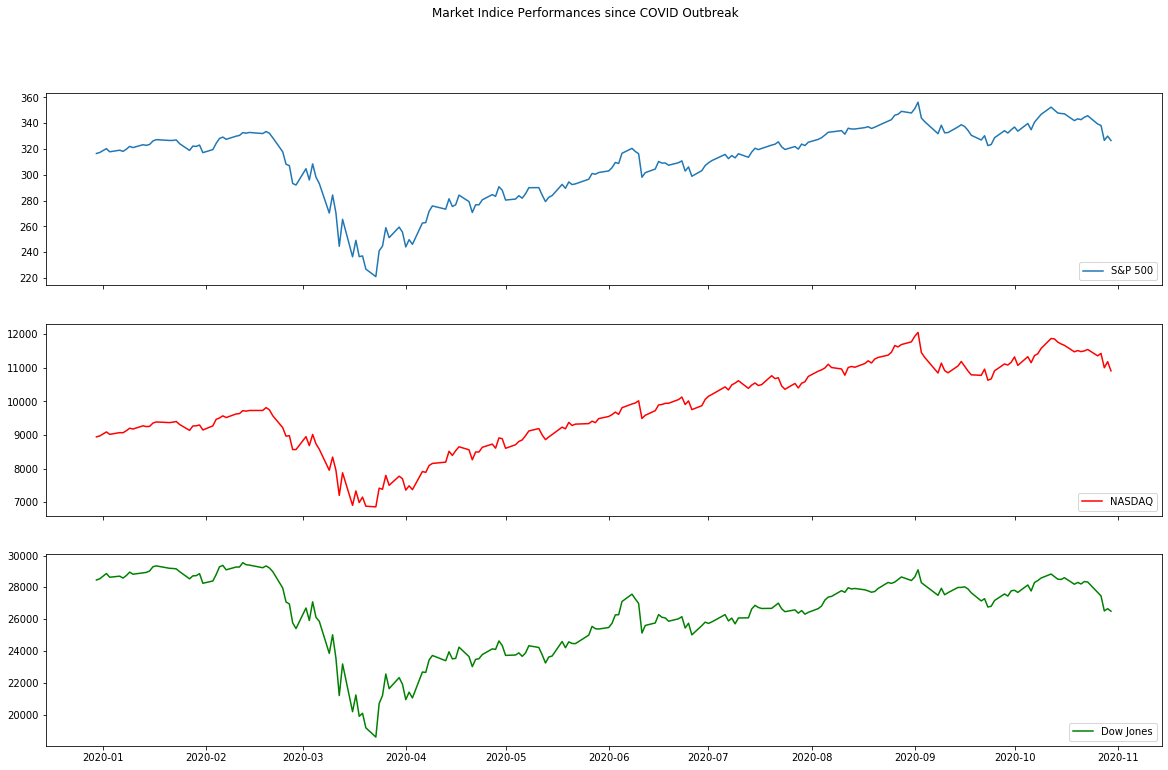

In [61]:
fig, axs = plt.subplots(3, sharex=True, figsize=(20,12))
fig.suptitle('Market Indice Performances since COVID Outbreak')
axs[0].plot(indices['SPY'], label='S&P 500')
axs[0].legend(loc='lower right')
axs[1].plot(indices['^IXIC'], label='NASDAQ',color='red')
axs[1].legend(loc='lower right')
axs[2].plot(indices['^DJI'], label='Dow Jones',color='green')
axs[2].legend(loc='lower right')
plt.savefig('Market-Indice-Performance')